制作自己的数据集

In [5]:
# 各种依赖
import os
import torch
import torch.utils.data as data
from PIL import Image

# from pathlib import Path
# from skimage import io
# import random
# import numpy as np

In [6]:
def default_loader(path):
    return Image.open(path).convert('RGB')

In [8]:

# 继承自 torch.utils.data.Dataset

class myDataset(data.Dataset):
    def __init__(self, root, label, transform = None, target_transform=None, loader=default_loader):
        fh = open(label)
        c=0
        imgs=[]
        class_names=[]
        for line in  fh.readlines():
            if c==0:
                class_names=[n.strip() for n in line.rstrip().split('	')]
            else:
                cls = line.split() 
                fn = cls.pop(0)
                if os.path.isfile(os.path.join(root, fn)):
                    imgs.append((fn, tuple([float(v) for v in cls])))
            c=c+1
        self.root = root
        self.imgs = imgs
        self.classes = class_names
        self.transform = transform
        self.target_transform = target_transform
        self.loader = loader
        
    # 然后实现2个方法
    def __getitem__(self, index):
    # 来提供数据索引，能通过index来找到数据
        fn, label = self.imgs[index]
        img = self.loader(os.path.join(self.root, fn))
        if self.transform is not None:
            img = self.transform(img)
        return img, torch.Tensor(label)

    def __len__(self):
    # 来提供数据大小（长度，length）
        return len(self.imgs)
    
    def getName(self):
        return self.classes


In [11]:
os.getcwd()

'/home/xiaoqi/deeplearning/pytorch/deepLearning'

In [23]:
data_images_dir = os.path.abspath(os.path.join(os.getcwd(), "../data/images"))

In [24]:
os.path.isdir(data_dir)

True

In [37]:
os.walk(data_dir)

<generator object walk at 0x7f7806c7cd00>

In [38]:
i = 0
for root, dirs, files in os.walk(data_dir):
#     print(root) #当前目录路径
#     print(dirs) #当前路径下所有子目录
#     print(len(files)) #当前路径下所有非目录子文件
#     print(files[0])
    file_path = os.path.join(root, files[0])
    print(file_path)
    i += 1
    print(i)

/home/xiaoqi/deeplearning/pytorch/data/images/newfoundland_131.jpg
1


In [33]:
os.listdir(data_dir)[0]

'newfoundland_131.jpg'

/home/xiaoqi/deeplearning/pytorch/data/images/newfoundland_131.jpg


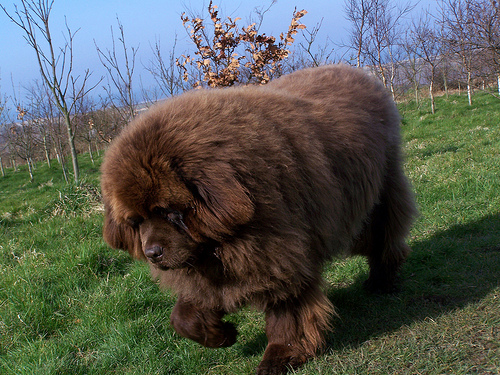

In [42]:
print(file_path)
default_loader(file_path)